In [1]:
import os
from sys import platform

import numpy as np
import matplotlib.pyplot as plt
from geant3_parser import Geant3DataFile
from geant3_parser import build_train_set_xy

In [3]:
file_name = os.path.join('data', 'shower_geant3_new.dat')

# file_name = 'sample_data.txt'
data_file = Geant3DataFile(file_name, skip_lines=3)

cells, true_values = build_train_set_xy(data_file, 5000, normalize=True)

arr=np.array([[]])
for i in range(4999,2):
    cells[i]=np.reshape(cells[i],1,-1)
    cells[i+1]=np.reshape(cells[i+1],1,-1)
    arr=np.hstack(cells[i],cells[i+1])

print(cells.shape)
input_dims = cells.shape[1]

Time open 2.168586254119873
Time split 0.5319013595581055
(5000, 121)


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [5]:
# build autoencoder
input_layer = Input(shape=(input_dims,))
encoder = Dense(128, activation='LeakyReLU')(input_layer)
encoder = Dense(64, activation='LeakyReLU')(encoder)
encoder = Dense(32, activation='LeakyReLU')(encoder)
encoder = Dense(16, activation='LeakyReLU')(encoder)
encoder = Dense(8, activation='LeakyReLU')(encoder)
encoder = Dense(4, activation='LeakyReLU')(encoder)
encoder = Dense(2, activation='LeakyReLU')(encoder)
encoder = Dense(1, activation='sigmoid')(encoder)
decoder = Dense(4, activation='LeakyReLU')(encoder)
decoder = Dense(8, activation='LeakyReLU')(decoder)
decoder = Dense(16, activation='LeakyReLU')(decoder)
decoder = Dense(32, activation='LeakyReLU')(decoder)
decoder = Dense(64, activation='LeakyReLU')(decoder)
decoder = Dense(128, activation='LeakyReLU')(decoder)
decoder = Dense(input_dims, activation='tanh')(decoder)
autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse', 'mae'])
autoencoder.summary()

2022-06-20 20:21:10.437579: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-06-20 20:21:11.161283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-20 20:21:11.161351: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P1000 computeCapability: 6.1
coreClock: 1.5185GHz coreCount: 4 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 89.53GiB/s
2022-06-20 20:21:11.161405: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-06-20 20:21:11.167102: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-06-20 20:21:11.167218: I tensorflow/stream_executor/platform/d

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 121)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               15616     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36    

In [13]:
# train autoencoder
history=autoencoder.fit(cells, cells, epochs=20, batch_size=32, shuffle=True, validation_split=0.2)
# save autoencoder
autoencoder.save('trained_models/reshape(5000, 121)_autoencoder.hd5')

Epoch 1/20
125/125 [==============================] - 3s 22ms/step - loss: 0.4543 - accuracy: 0.0063 - mse: 0.0145 - mae: 0.0620 - val_loss: 0.4568 - val_accuracy: 0.0060 - val_mse: 0.0146 - val_mae: 0.0626
Epoch 2/20
125/125 [==============================] - 2s 16ms/step - loss: 0.4543 - accuracy: 0.0063 - mse: 0.0145 - mae: 0.0628 - val_loss: 0.4567 - val_accuracy: 0.0060 - val_mse: 0.0146 - val_mae: 0.0636
Epoch 3/20
125/125 [==============================] - 2s 14ms/step - loss: 0.4356 - accuracy: 0.0058 - mse: 0.0146 - mae: 0.0661 - val_loss: 0.4112 - val_accuracy: 0.0080 - val_mse: 0.0145 - val_mae: 0.0691
Epoch 4/20
125/125 [==============================] - 2s 16ms/step - loss: 0.4052 - accuracy: 0.0063 - mse: 0.0141 - mae: 0.0689 - val_loss: 0.4049 - val_accuracy: 0.0090 - val_mse: 0.0144 - val_mae: 0.0712
Epoch 5/20
125/125 [==============================] - 2s 16ms/step - loss: 0.4025 - accuracy: 0.0052 - mse: 0.0148 - mae: 0.0728 - val_loss: 0.3409 - val_accuracy: 0.0000e+

INFO:tensorflow:Assets written to: trained_models/reshape(5000, 121)_autoencoder.hd5/assets


INFO:tensorflow:Assets written to: trained_models/reshape(5000, 121)_autoencoder.hd5/assets


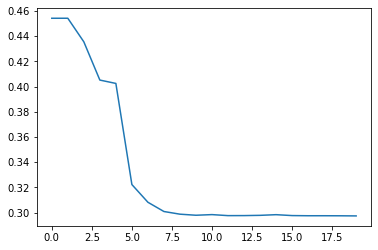

In [14]:
plt.plot(history.history['loss'])

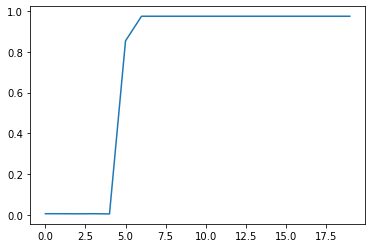

In [15]:
plt.plot(history.history['accuracy'])

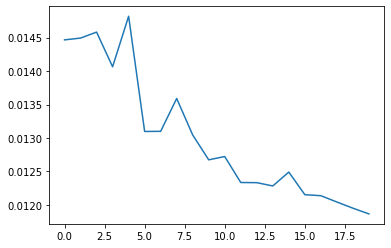

In [16]:
plt.plot(history.history['mse'])

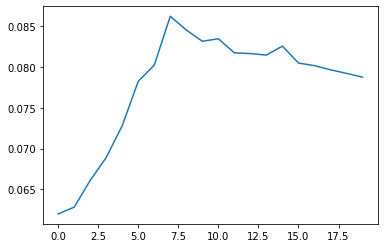

In [17]:
plt.plot(history.history['mae'])